In [1]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 5.3 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 
     |████████████████████████████████| 9.9 MB 60.1 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 428 kB 80.2 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.8 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is 

In [1]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [4]:
# # load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

df = pd.concat([df_english, df_french], axis = 1)

df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

english_words = []
french_words  = []

# function to get the list of unique words
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)
            
            
df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

# number of unique words in english
total_english_words  = len(english_words)
total_english_words

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


199

In [5]:
# number of unique words in french
# number of unique words in french
total_french_words = len(french_words)
total_french_words

350

In [6]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
english_words_counts = Counter(words)
english_words_counts

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

In [7]:
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [8]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [9]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

## If barplot is not visible, refer data folder for corresponding images.


# **Above bar plot, represents token(word) frequency in english sentences.**

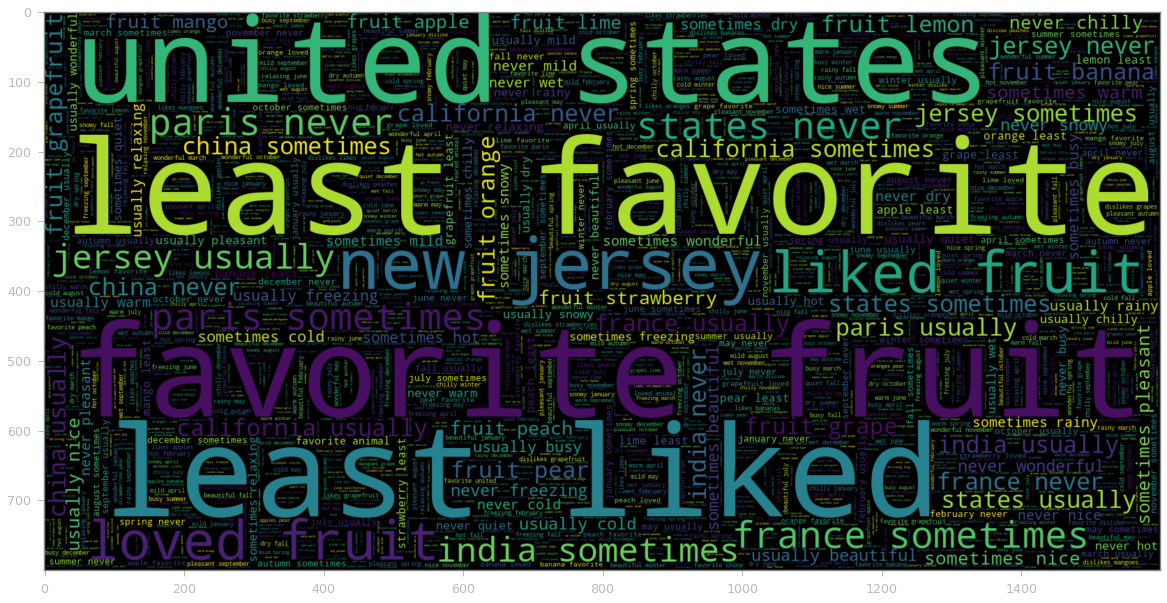

In [11]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

## **Above word cloud, reveals that data mostly talks about fruit, countries and weather conditions etc.**

In [12]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [14]:
# obtain the count of french words
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)


french_words_counts = Counter(words)
french_words_counts




Counter({'-': 328,
         '-ce': 95,
         '-elle': 24,
         '-il': 36,
         '-ils': 26,
         'a': 1356,
         'agréable': 17751,
         'aimait': 707,
         'aime': 8870,
         'aiment': 1116,
         'aiment-ils': 10,
         'aimeraient': 12,
         'aimez': 1053,
         'aimons': 1111,
         'aimé': 25852,
         'aimée': 105,
         'aimés': 237,
         'aller': 1180,
         'allez': 45,
         'allions': 1,
         'allons': 45,
         'allé': 187,
         'allée': 150,
         'allés': 150,
         'amusant': 260,
         'anglais': 312,
         'animal': 2248,
         'animaux': 768,
         'août': 8789,
         'apprécié': 2,
         'as-tu': 1,
         'at': 32,
         'au': 25738,
         'automne': 14727,
         'automobile': 278,
         'aux': 392,
         'avez': 162,
         'avons': 19,
         'avril': 8954,
         'banane': 4848,
         'bananes': 5844,
         'beau': 6387,
         'belle': 

In [15]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)


# append the values to a list for visuaization purpose
french_words = []
french_counts = []


for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

fig = px.bar(x = french_words, y = french_counts)
fig.show()




## If barplot is not visible, refer data folder for corresponding images.

# **Above bar plot, represents token (word) frequency in french sentences**

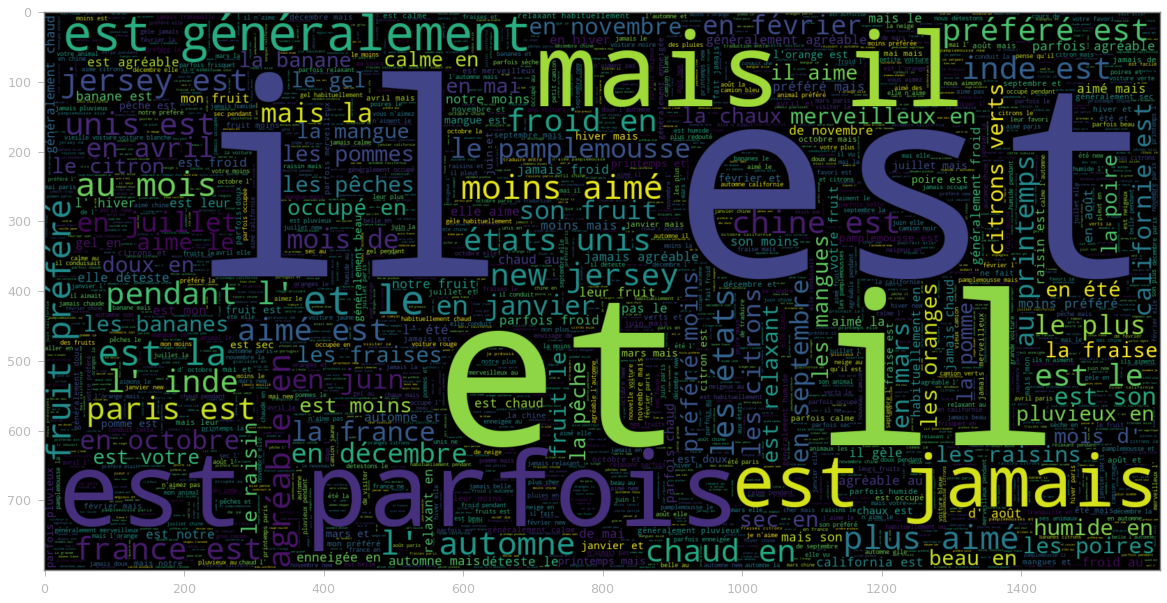

In [17]:
# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')




## **Above word cloud, represents the same data for french language.**

In [18]:

# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


In [19]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [20]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [21]:
# common words observed in both language
set(english_words).intersection(set(french_words))

{'a',
 'animal',
 'automobile',
 'california',
 'eiffel',
 'football',
 'france',
 'fruit',
 'i',
 'jersey',
 'limes',
 'lion',
 'lions',
 'new',
 'oranges',
 'paris'}